# LOGISTIC REGRESSION

## CODE THUAN

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =  pd.read_csv('resource/data_classification.csv', header=None)

df

,0,1,2
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
...,...,...,...
95,0.022280,2.658428,0
96,7.630637,7.405351,1
97,3.684997,5.049965,0
98,7.484260,6.059396,1


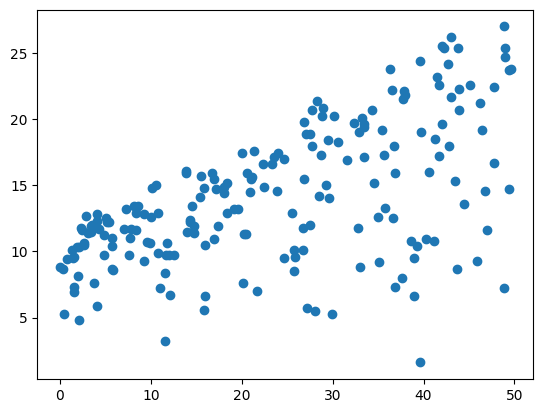

In [48]:
# X radio , Y Sales
X = df.values[:,2]
Y = df.values[:,4]

plt.scatter(X,Y,marker='o')
plt.show()

In [5]:
# sigmoid 1 / (1 + e^(-x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def phanchia(p):
    if p >= 0.5:
        return 1
    else:
        return 0

In [28]:
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)



array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999998, 1.        , 1.        , 1.        , 1.        ,
       0.99999998, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999996,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [54]:
def cost_function(features,labels, weights):
    """
    z = bias + w1*x + w2*x
    weights (3x1) [[bias],[w1],[w2]]
    labels (100x1) [1,0...]
    features (100x3) [[1,x1,x2],[...]...]
    """
    n = len(labels)
    predictions = predict(features, weights)
    """
    predictions
    [0.6,0.7,0.4...]
    """
    cost_class1 = -labels*np.log(predictions) # if y = 1
    cost_class0 = -(1-labels)*np.log(1 - predictions) # if y = 0
    cost = cost_class1 + cost_class0
    return sum(cost)/n


    

In [45]:
def update_weight(features, labels, weights, learning_rate):
    n = len(labels)
    predictions = predict(features, weights)
    # C' = x(s(z) - y)
    gradient = np.dot(features.T, (predictions - labels)) / n
    weights = weights - gradient* learning_rate
    return weights



In [ ]:
def train(features, labels, weights, learning_rate, iter):
    cost_hs = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features,labels, weights)
        cost_hs.append(cost)
        len_cost = len(cost_hs)
        if len_cost > 1:
            if abs(cost - cost_hs[-2]) < 0.0001:
                break
    return weights, cost_hs

features = df[[0,1]]
features[2] = pd.Series([1] * 100)
labels = df[2]
weights = np.array([2,0.3,5])

train(features,labels,weights, 0.0001, 100)

## Thực nghiệm theo công thức

In [1]:
import numpy as np 

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])


In [2]:
# B1. Hàm ước lượng

def sigmoid(x, y, w):
    # y_hat = 1/[1 + e^-(w1*x + w0*1)]
    return 1 / (1 + np.exp(-np.dot(w,x)))

In [3]:
#B2. Hàm loss

def lose_CE(y, y_hat):
    # cross entropy
    # Loss = -[y * log(y_hat) + (1 - y)*log(1 - y_hat)]
    N = len(y)
    return -(np.dot(y, np.log(y_hat.T)) + np.dot((1 - y),np.log(1-y_hat.T)))/N
    # return -( np.dot(y, np.log(y_hat)) + np.dot((1 - y),np.log(1-y_hat)))/N

In [4]:
# B3. Đạo hàm của hàm loss

def d_loss_CE(x,y, y_hat):
    # d_loss = (y_hat - y)*x.T
    return np.dot(y_hat - y, x.T)

In [5]:
def update_w(w, d_loss, learning_rate):
    return w - d_loss*learning_rate

In [6]:
#B4: train logic
#4.1: Toàn bộ mẫu cho 1 lần train
def train_CE_GradientDescent(X, y, w, learning_rate = 0.01, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    while times > 0:
        y_hat = sigmoid(x,y,w)
        loss = lose_CE(y,y_hat)
        d_loss = d_loss_CE(x,y,y_hat)
        w = update_w(w, d_loss,learning_rate)
        his_cos.append(loss)
        if loss < 0:
            break
        times -= 1
        
    return w, his_cos

w = np.array([0.05,0.05])

w_CE, his_cos_CE = train_CE_GradientDescent(X,y,w,learning_rate=0.00001)
print(f'w_CE: {w_CE}')
print(f'his_cos_CE: {his_cos_CE}')

w_CE: [0.04990531 0.05069485]
his_cos_CE: [0.6729786014854232, 0.6729539193818134, 0.6729292591735051, 0.6729046208366689, 0.672880004347502, 0.6728554096822276, 0.672830836817095, 0.6728062857283805, 0.672781756392386, 0.6727572487854401]


In [7]:
#4.2 1 mẫu cho 1 lần train -> update w
def train_CE_StochasticGradientDescent(X, y, w, learning_rate = 0.01, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    
    while times > 0:
        for i in range(len(y)):
            # convert to np array
            # x[:,i:i+1]
            x_p = np.array([x[0,i:i+1],
                            x[1,i:i+1]]                 )
            y_p = np.array([y[i]])
            print(f'input: x: {x_p} - y: {y_p}')
            
            y_hat = sigmoid(x_p,y_p,w)
            loss = lose_CE(y_p,y_hat)
            d_loss = d_loss_CE(x_p,y_p,y_hat)
            w = update_w(w, d_loss,learning_rate)
            print(f'update w: {w}')
            
        print(f'repeat: w: {w} - loss: {loss}')
        his_cos.append(loss)
        # if loss < 0:
        #     break
        times -= 1
        
    return w, his_cos
train_CE_StochasticGradientDescent(X,y,w,learning_rate=0.1)

input: x: [[1. ]
 [0.5]] - y: [0]
update w: [-0.00187412  0.02406294]
input: x: [[1.  ]
 [0.75]] - y: [0]
update w: [-0.05227844 -0.0137403 ]
input: x: [[1.]
 [1.]] - y: [0]
update w: [-0.10062857 -0.06209043]
input: x: [[1.  ]
 [1.25]] - y: [0]
update w: [-0.14618429 -0.11903508]
input: x: [[1. ]
 [1.5]] - y: [0]
update w: [-0.18813647 -0.18196334]
input: x: [[1.  ]
 [1.75]] - y: [0]
update w: [-0.22573621 -0.24776289]
input: x: [[1.  ]
 [1.75]] - y: [1]
update w: [-0.15982542 -0.13241901]
input: x: [[1.]
 [2.]] - y: [0]
update w: [-0.19936555 -0.21149928]
input: x: [[1.  ]
 [2.25]] - y: [1]
update w: [-0.13309803 -0.06239735]
input: x: [[1. ]
 [2.5]] - y: [0]
update w: [-0.17592066 -0.16945393]
input: x: [[1.  ]
 [2.75]] - y: [1]
update w: [-0.11040195  0.01072253]
input: x: [[1.]
 [3.]] - y: [0]
update w: [-0.15844709 -0.13341289]
input: x: [[1.  ]
 [3.25]] - y: [1]
update w: [-0.0940638   0.07583279]
input: x: [[1. ]
 [3.5]] - y: [0]
update w: [-0.14833713 -0.11412384]
input: x: [[

(array([-1.61793933,  0.92015725]),
 [0.059836759800790604,
  0.05379241851629513,
  0.05040410291476143,
  0.047413506575991575,
  0.044746222155818624,
  0.04236051593925559,
  0.04022013863034262,
  0.038293630754705266,
  0.03655385919295616,
  0.034977508075144534])

In [8]:
#4.3 4 mẫu cho 1 lần train -> update w
def train_CE_BatchGradientDescent(X, y, w, learning_rate = 0.01, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    n_train = 4
    length = int(len(y)/n_train)
    print(n_train)
    while times > 0:
        for i in range(length):
            # convert to np array
            x_p = np.array([x[0,i*n_train:(i+1)*n_train], # i = 0 => [0,0:4], i = 1 => [0,4:8]
                            x[1,i*n_train:(i+1)*n_train]]) 
            y_p = np.array(y[i*n_train:(i+1)*n_train])
            print(f'input: x: {x_p} - y: {y_p}')
            
            y_hat = sigmoid(x_p,y_p,w)
            loss = lose_CE(y_p,y_hat)
            d_loss = d_loss_CE(x_p,y_p,y_hat)
            w = update_w(w, d_loss,learning_rate)
            print(f'update w: {w}')
            
        his_cos.append(loss)
        print(f'repeat: w: {w} - loss: {loss}')
        # if loss < 0:
        #     break
        times -= 1
        
    return w, his_cos

train_CE_BatchGradientDescent(X,y,w,learning_rate=0.1)

4
input: x: [[1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25]] - y: [0 0 0 0]
update w: [-0.15936768 -0.13358648]
input: x: [[1.   1.   1.   1.  ]
 [1.5  1.75 1.75 2.  ]] - y: [0 0 1 0]
update w: [-0.22055716 -0.24026636]
input: x: [[1.   1.   1.   1.  ]
 [2.25 2.5  2.75 3.  ]] - y: [1 0 1 0]
update w: [-0.1403008  -0.05301967]
input: x: [[1.   1.   1.   1.  ]
 [3.25 3.5  4.   4.25]] - y: [1 0 1 1]
update w: [-0.00671324  0.4737387 ]
input: x: [[1.   1.   1.   1.  ]
 [4.5  4.75 5.   5.5 ]] - y: [1 1 1 1]
update w: [0.0290786  0.64842683]
repeat: w: [0.0290786  0.64842683] - loss: 0.0938531413684286
input: x: [[1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25]] - y: [0 0 0 0]
update w: [-0.22842661  0.4184846 ]
input: x: [[1.   1.   1.   1.  ]
 [1.5  1.75 1.75 2.  ]] - y: [0 0 1 0]
update w: [-0.37771548  0.15600186]
input: x: [[1.   1.   1.   1.  ]
 [2.25 2.5  2.75 3.  ]] - y: [1 0 1 0]
update w: [-0.38089264  0.12144367]
input: x: [[1.   1.   1.   1.  ]
 [3.25 3.5  4.   4.25]] - y: [1 0 1 1]
up

(array([-1.7610001 ,  1.01086016]),
 [0.0938531413684286,
  0.11285579817415968,
  0.11244173069239467,
  0.11203059423735011,
  0.11139298101105374,
  0.11050625272817191,
  0.1093849134765725,
  0.1080636271698159,
  0.10658497745168591,
  0.104991849793764])

In [9]:
# general func

def train_CE(X, y, w, descent = 1, learning_rate = 0.01, times = 10):
    # gradient
    if type(descent) == int:
        if descent <= len(y):
            n_train = descent
        elif descent > len(y):
            n_train = len(y)
    else:
        if descent == 'nomal':
            n_train = len(y)
        else:
            return 'descent is "nomal" or int+'

    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    length = int(np.ceil(len(y)/n_train))
    print(length)
    
    while times > 0:
        for i in range(length):
            # convert to np array
            x_p = np.array([x[0,i*n_train:(i+1)*n_train], # i = 0 => [0,0:4], i = 1 => [0,4:8]
                            x[1,i*n_train:(i+1)*n_train]]) 
            y_p = np.array(y[i*n_train:(i+1)*n_train])
            print(f'input: x: {x_p} - y: {y_p}')
            
            y_hat = sigmoid(x_p,y_p,w)
            loss = lose_CE(y_p,y_hat)
            d_loss = d_loss_CE(x_p,y_p,y_hat)
            w = update_w(w, d_loss,learning_rate)
            print(f'update w: {w}')
            
        his_cos.append(loss)
        print(f'repeat: w: {w} - loss: {loss}')
        # if loss < 0:
        #     break
        times -= 1
        
    return w, his_cos

train_CE(X,y,w,descent=8, learning_rate=0.1)

3
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.  ]] - y: [0 0 0 0 0 0 1 0]
update w: [-0.27309579 -0.33276619]
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.  ]
 [2.25 2.5  2.75 3.   3.25 3.5  4.   4.25]] - y: [1 0 1 0 1 0 1 1]
update w: [0.0582431  0.79840242]
input: x: [[1.   1.   1.   1.  ]
 [4.5  4.75 5.   5.5 ]] - y: [1 1 1 1]
update w: [0.06572303 0.8345937 ]
repeat: w: [0.06572303 0.8345937 ] - loss: 0.018890103939072412
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.  ]] - y: [0 0 0 0 0 0 1 0]
update w: [-0.43722604  0.18776573]
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.  ]
 [2.25 2.5  2.75 3.   3.25 3.5  4.   4.25]] - y: [1 0 1 0 1 0 1 1]
update w: [-0.36928306  0.44446189]
input: x: [[1.   1.   1.   1.  ]
 [4.5  4.75 5.   5.5 ]] - y: [1 1 1 1]
update w: [-0.31329958  0.71804271]
repeat: w: [-0.31329958  0.71804271] - loss: 0.1510232268513375
input: x: [[1.   1.   1.   1.   1.

(array([-1.88175844,  1.03580785]),
 [0.018890103939072412,
  0.1510232268513375,
  0.076568117224653,
  0.0841258716431249,
  0.08773804931236223,
  0.0923026325538083,
  0.09634357390480897,
  0.09979328296420933,
  0.10249293836789244,
  0.1044143052236393])

1 Machine learning theo các bạn là gì?

Sư dụng máy học để dự đoán kết quả từ dữ liệu có sẵn

2. Tại sao cần dùng machine learning trong thực tế, để dùng được cần có gì

thực tế có vô vàng tình huống, ta dùng kết quả của lịch sử để giúp dự đoán cho tình huống bất kì với khả năng chấp nhận được.
Để dùng được cần: data, data phải phù hợp với yêu cầu
- xác định đầu vào đầu ra của tập dữ liệu
- chọn mô hình máy học phù hợp (linear, logistic)
- chia tệp train - test. thử nghiệm cho kết quả tỷ lệ chấp nhận được (90%,95%...)

3. GD, SGD, BGD các bạn có nhớ điểm khác nhau của nó k
gradient descent: tính 1 lần toàn bộ tệp, rồi cập nhật w
stochastic GD: tính 1 lần 1 mẫu, cập nhật w,
batch GGD: tính 1 lần nhóm mẫu, cập nhật w

gradient descent; nhanh, độ chính xác chưa chắc cao
stochastic: chậm, độ chính xác dễ dàng cao
batch: cân bằng lại ưu và nhược của 2 cái trên